In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read json file from https://data.sfgov.org/COVID-19/Covid-19-Tests/nfpa-mg4g for SF testing data
SF_data = pd.read_json("Resources/nfpa-mg4g.json")
#read csv file from http://dashboard.publichealth.lacounty.gov/covid19_surveillance_dashboard/ for LA testing data
LA_data = pd.read_csv("Resources/LA_County_Covid19_tests_date_table.csv")
#convert timestamp by dropping parts of the string
SF_data["specimen_collection_date"] = SF_data["specimen_collection_date"].str.replace("T00:00:00.000", "")

In [3]:
#reverse dataframe and index so order of time is consistent
LA_data = LA_data[::-1].reset_index()

In [4]:
#remove rows so that the dates match up for chart comparisons
SF_data = SF_data.drop(SF_data.index[0:10]).reset_index()
LA_data = LA_data.drop(LA_data.index[207:209])

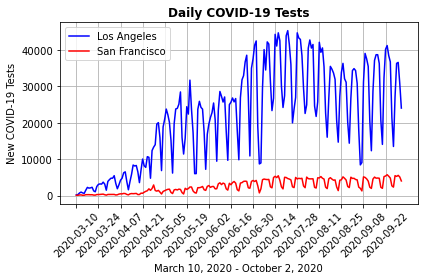

In [5]:
#create lists for our chart
date_axis = LA_data["date_use"].tolist()
LA_tests = LA_data["tests"].tolist()
SF_tests = SF_data["tests"].tolist()

#chart daily number of tests from LA and SF counties over time
LA_line, = plt.plot(date_axis, LA_tests, color="blue", label="Los Angeles")
SF_line, = plt.plot(date_axis, SF_tests, color="red", label="San Francisco")
plt.title("Daily COVID-19 Tests", fontweight="bold")
plt.xlabel("March 10, 2020 - October 2, 2020")
plt.ylabel("New COVID-19 Tests")
plt.legend(handles=[LA_line, SF_line], loc="best")

#reduce the number of ticks on the x axis with 'slice notation'
plt.xticks(date_axis[::14], rotation="45")
plt.grid()
plt.tight_layout()
plt.savefig("Output_data/DailyTests.png", transparent=True, dpi=300)
plt.show()

In [6]:
#create new columns for per capita, using census info you extracted earlier
LASF_census = pd.read_csv("Resources/LASF_Census2018.csv")
LA_pop = LASF_census.iloc[0, 1]
SF_pop = LASF_census.iloc[1, 1]

LA_data["test per cap"] = (LA_data["tests"]/LA_pop) * 100000
SF_data["test per cap"] = (SF_data["tests"]/SF_pop) * 100000

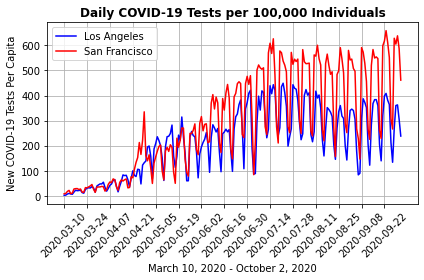

In [7]:
#same stuff as before just for tests per 100,000 people per county over time
LA_y = LA_data["test per cap"].tolist()
SF_y = SF_data["test per cap"].tolist()

LA_line2, = plt.plot(date_axis, LA_y, color="blue", label="Los Angeles")
SF_line2, = plt.plot(date_axis, SF_y, color="red", label="San Francisco")
plt.title("Daily COVID-19 Tests per 100,000 Individuals", fontweight="bold")
plt.xlabel("March 10, 2020 - October 2, 2020")
plt.ylabel("New COVID-19 Tests Per Capita")
plt.legend(handles=[LA_line2, SF_line2], loc="best")

plt.xticks(date_axis[::14], rotation="45")

plt.grid()
plt.tight_layout()
plt.savefig("Output_data/DailyTests_PerCapita.png", transparent=True, dpi=300)
plt.show()